# Experimento 2: Linhas em Regime Senoidal

**Nome:** Lucas Guimarães Braga **RA:** 182543

**Nome:** Lucas Zenichi Terada **RA:** 182775

**Nome:** Nicolas Franco Rufino Almeida Prado **RA:** 185142

In [2]:
# Helper imports and definitions

import numpy
from matplotlib import pyplot

%matplotlib inline

def float2(s):
    return float(s.replace(b',', b'.'))

def load_spectrum_csv(filename):
    data = numpy.loadtxt(filename, delimiter=';', skiprows=15, usecols=[0, 1], converters={0: float2, 1: float2})
    return tuple(data[:, i] for i in range(data.shape[1]))

# Constante de propagação

Pode-se modelar uma linha de transmissão infinita como:

\begin{equation}
V (z)= V^{+} e^{-\gamma z} = V^{+} e^{-(\alpha + i\beta)z}
\end{equation}

em que definimos o gerador na posição $z = −l$ e a carga em $z = 0$.
Nota-se que a constante de *propagação* $\gamma$ é composta de uma constante de *fase* ($\beta$) e uma de *atenuação* ($\alpha$).
No caso de linhas de transmissão homogêneas e sem perdas, a relação entre a constante de fase e a frequência angular de operação é dada por:

\begin{equation}
\beta = \omega \sqrt{\mu \varepsilon} = \frac{\omega}{v_{p}}
\end{equation}

em que $\mu$ é a permeabilidade magnética do meio, $\varepsilon$ sua permissividade elétrica e $v_p$ é a velocidade de fase dos campos.
Como consequência, essa linha não apresenta dispersão (diretamente relacionada a $\frac{{\mathrm d}^2\beta}{{\mathrm d}\omega^2}$), permitindo que sinais com grande largura de banda possam propagar-se sem sofrer distorções consideráveis.
Por esse motivo, os cabos coaxiais são ainda hoje utilizados rotineiramente para
transmissões de taxas relativamente altas (centenas de megahertz), como no caso de TV de alta definição. 

Há, porém, limites para as frequências de transmissão suportadas pelas linhas, pois na realidade os materiais utilizados em sua construção apresentam perdas e dispersão material.
Para o cabo coaxial, as perdas introduzidas pelos condutores são o fator limitante mais importante.
A modelagem de perdas em condutores é feita utilizando-se o chamado *efeito pelicular*, por meio do qual o campo elétrico penetra em uma fina camada superficial do condutor.
A *profundidade de penetarção* depende da condutividade do material e da frequência de operação. 

Em cabos coaxiais, a constante de atenuação do cabo (em Np/m) relaciona-se à condutividade dos condutores através de:

\begin{align}
& \alpha = \frac{R_s}{4 \pi Z_0}\left(\frac{1}{a}+\frac{1}{b}\right) \\
& R_s = \sqrt{\frac{\omega \mu}{2 \sigma}}
\end{align}

em que $R_s$ é a resistência superficial do condutor e $a$ e $b$ são os raios interno e externo do anel dielétrico do cabo.

Assim, em altas frequências, as perdas provocadas pela propagação nos condutores limitam a distância de transmissão dos sinais. Por essa razão, os sinais de taxas mais altas são transportados por guias dielétricos, em especial a fibra óptica, que será estudada em experimentos futuros. 

Se a linha de transmissão estiver descasada na terminação de carga, haverá aí uma reflexão e a tensão ao longo da linha será descrida por:

\begin{align}
& V (z)= V^{+} e^{-\gamma z} + V^{-} e^{+\gamma z} \\
& \Gamma = \frac{V^-}{V^+} = \frac{Z_L - Z_0}{Z_L + Z_0}
\end{align}

em que $\Gamma$ é o coeficiente de reflexão provocado pela diferença entre a impedância característica da linha ($Z_0$) e a impedância da carga ($Z_L$).

Em especial, para uma linha sem perdas e terminada em curto ou aberto, calcula-se o sinal na entrada da linha como:

\begin{equation}
V_{in} = V(-l) = \begin{cases}
i 2V^+ \sin(\beta l), & \text{para linha em curto} \\
2V^+ \cos(\beta l), & \text{para linha em aberto}
\end{cases}
\end{equation}

Dessa forma, para determinadas frequências de operação, observa-se um nulo na entrada da linha em cada um dos casos.

Pode-se entender intuitivamente o processo de propagação considerando que o fasor do sinal de entrada da linha adquire uma fase $\beta l$ até atingir a carga.
Aí ele é refletido com (sem) inversão de fase pelo curto (aberto).
O sinal que retorna adquire uma nova defasagem $\beta l$ e soma-se ao sinal original.
Os mínimos ocorrerão quando esses sinais tiverem fases opostas, anulando-se.
Esse processo pode ser descrito segundo a equação:

\begin{equation}
2 \beta l + \angle\Gamma_L = (2n+1)\pi, \quad n=0, 1, 2\ldots
\end{equation}

## Caracterização da constante de atenuação

Meça a atenuação do cabo de 100 m para a faixa de frequências de 2 MHz a 20 MHz.
Considerando que a dependência da atenuação com a frequência de operação pode ser escrita como:

\begin{equation}
\alpha = qf^p
\end{equation}

utilize um gráfico log-log para ajustar os parâmetros $p$ e $q$ aos dados coletados.

Como $p$ se compara ao valor esperado?

Angular coefficient: p = 0.51 ± 0.01


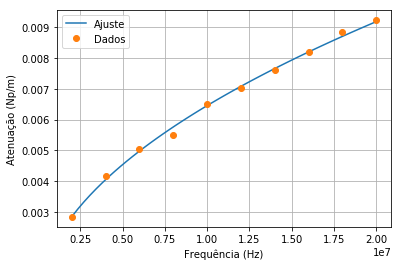

In [6]:
# Replace the values with your measurements

# Frequency [Hz]
f = numpy.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) * 1e6

# α [Np/m]
α = numpy.array([2.82, 4.17, 5.04, 5.5, 6.5, 7.03, 7.6, 8.2, 8.84, 9.25])*1e-3

log_f = numpy.log10(f)
log_α = numpy.log10(α)
coef, cov = numpy.polyfit(log_f, log_α, 1, cov=True) 
p, log_q = coef
std_p, std_log_q = numpy.sqrt(cov.diagonal())

print(f'Angular coefficient: p = {p:.2f} ± {std_p:.2f}')

f_plot = numpy.linspace(f[0], f[-1], 51)
pyplot.plot(f_plot, 10**log_q * f_plot**p, label='Ajuste')
pyplot.plot(f, α, 'o', label='Dados')
pyplot.legend()
pyplot.xlabel('Frequência (Hz)')
pyplot.ylabel('Atenuação (Np/m)')
pyplot.grid(True)

**RESPOSTA:** Dado que:

$$\alpha = \frac{R_{s}}{4\pi Z_0}\left(\frac{1}{a}+\frac{1}{b}\right)$$

$$R_s = \sqrt{\left(\frac{\omega\mu}{2\sigma}\right)}$$

É possível observar que $\alpha$ é proporcional a $f^{1/2}$, já que $\alpha$ é proporcional a $R_s$ e este é proporcional à raíz quadrada de $f$.
Portanto conclui-se que o valor obtido de $p = 0.51$ é próximo do esperado.

## Caracterização da constante de fase

Utilizando uma montagem apropriada com o cabo coaxial de 100 m, meça com o osciloscópio a defasagem entre os sinais de entrada e saída para pelo menos 10 frequências de operação de 100 kHz a 1 MHz.

Plote os dados coletados e ajuste a eles uma reta para demonstrar a relação:

\begin{equation}
\beta = \frac{\omega}{v_p}
\end{equation}

lembrando que a defasagem medida $\phi = \beta L$, com $L$ o comprimento do cabo.
Qual é o valor de $v_p$ obtido pelo ajuste?

Angular coefficient: (2.94e+05 ± 3.76e+03) [Hz/rad]
Linear coefficient: (-9.19e+03 ± 8.04e+03) [Hz]


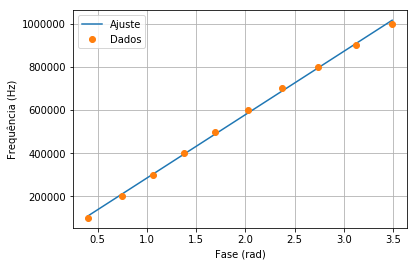

In [5]:
# Replace the values with your measurements

# Frequency [Hz]
f = numpy.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * 1e6

# Phase [rad]
ϕ = numpy.array([23, 43, 61, 79, 97, 116, 136, 157, 179, 200]) * numpy.pi / 180

coef, cov = numpy.polyfit(ϕ, f, 1, cov=True)
std = numpy.sqrt(cov.diagonal())
print(f'Angular coefficient: ({coef[0]:.2e} ± {std[0]:.2e}) [Hz/rad]')
print(f'Linear coefficient: ({coef[1]:.2e} ± {std[1]:.2e}) [Hz]')

pyplot.plot(ϕ, coef[0] * ϕ + coef[1], label='Ajuste')
pyplot.plot(ϕ, f, 'o', label='Dados')
pyplot.legend()
pyplot.xlabel('Fase (rad)')
pyplot.ylabel('Frequência (Hz)')
pyplot.grid(True)

**RESPOSTA:** Dado que:
$$v_p = \frac{\omega}{\beta}$$

e

$$\beta = L\phi$$

Pode-se escrever $v_p$ da seguinte forma:

$$v_p = 2\pi L\frac{f}{\phi}$$

Como $\frac{f}{\phi}$ é o coeficiente angular da reta obtida, então:

$$v_p = 2\times 100 \times \pi \times 2.94 \times 10^ 5 \implies v_p = 1.847 \times 10^8 \frac{m}{s}$$ 

Com o cabo terminado em curto-circuito, circuito aberto e impedância casada, observe o sinal na entrada do cabo para diferentes valores de frequência. Faça uma varredura em frequência para a observação de diversos máximos e mínimos.

Para essa medição, utilize o gerador de sinais em modo de varredura e o analisador de espectro no modo *hold max*. 

Apresente o gráfico obtido e interprete os resultados.

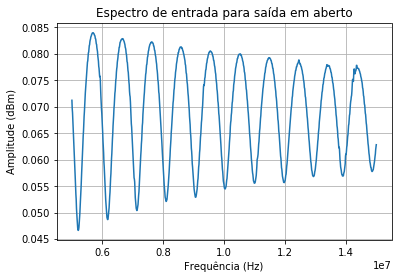

In [7]:
# Plot signals from spectrum analyzer
# Do not forget to modify the axes labels according to your setup
freq, signal = load_spectrum_csv('aberto.csv')
pyplot.plot(freq, signal)
pyplot.title("Espectro de entrada para saída em aberto")
pyplot.xlabel('Frequência (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.grid(True)

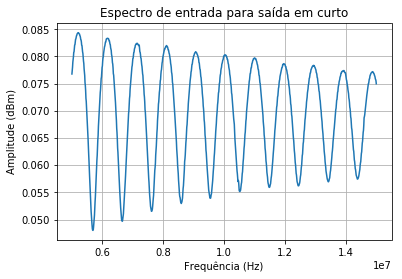

In [8]:
# Plot signals from spectrum analyzer
# Do not forget to modify the axes labels according to your setup
freq, signal = load_spectrum_csv('curto.csv')
pyplot.plot(freq, signal)
pyplot.title("Espectro de entrada para saída em curto")
pyplot.xlabel('Frequência (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.grid(True)

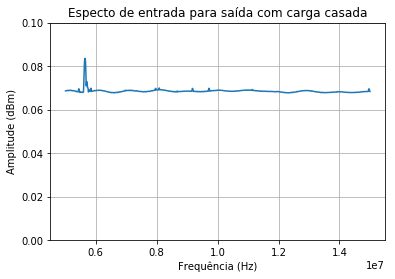

In [9]:
# Plot signals from spectrum analyzer
# Do not forget to modify the axes labels according to your setup
freq, signal = load_spectrum_csv('casada.csv')
pyplot.plot(freq, signal)
pyplot.title("Especto de entrada para saída com carga casada")
pyplot.xlabel('Frequência (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.ylim(0,0.1)
pyplot.grid(True)

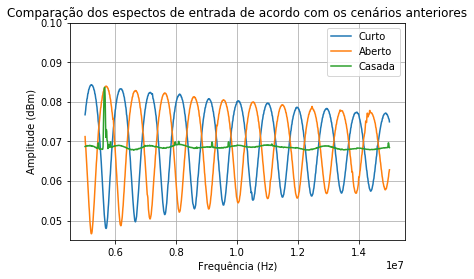

In [4]:
# Plot signals from spectrum analyzer
# Do not forget to modify the axes labels according to your setup

freq1, signal1 = load_spectrum_csv('curto.csv')
freq2, signal2 = load_spectrum_csv('aberto.csv')
freq3, signal3 = load_spectrum_csv('casada.csv')


p1 = pyplot.plot(freq1, signal1)
p2 = pyplot.plot(freq2, signal2)
p3 = pyplot.plot(freq3, signal3)

pyplot.title("Comparação dos espectos de entrada de acordo com os cenários anteriores")
pyplot.xlabel('Frequência (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.legend((p1[0],p2[0],p3[0]),("Curto","Aberto","Casada"))
pyplot.ylim(0.045,0.1)
pyplot.grid(True)

**RESPOSTA:** Com base no gráfico de espectro de entrada para a carga casada com a linha, é possível observar que o sinal de entrada não muda com a frequência, uma vez que a carga de 50 $\Omega$ não muda com a frequência e, portanto, não há efeito de reflexão em nenhum ponto do espectro analisado, já que em teoria não há reflexão quando a linha está casada com a carga.

Por fim, observando a relação entre os espectros com a saída em curto e em aberto, através da figura de comparação dos espectros de entrada, observa-se que estes estão defasados de $\pi$ radianos. Isto ocorre pelo fato do coeficiente de reflexão ser igual a 1 e -1 para os casos em aberto e curto, respectivamente.


# Padrão de onda estacionária

Em uma linha de transmissão malterminada, as tensões e correntes formam um padrão de onda estacionária.
A razão entre máximos e mínimos desse padrão, chamada razão de onda estacionária (ROE), ou *standing wave ratio* (SWR), é um parâmetro útil em diversos casos práticos.
Conhecendo-se a linha de transmissão pode-se, por exemplo, determinar a impedância de uma carga desconhecida (e.g. uma antena recém projetada).
De forma análoga, conhecendo-se a carga, podem-se calcular parâmetros da linha de transmissão.

Em termos matemáticos, se a linha for terminada em uma carga $Z_L$, suas tensões e correntes a uma distância $z'$ da carga podem ser expressas como:

\begin{align}
& V(z') = I_L[Z_L\cosh(\gamma z')+Z_0\sinh(\gamma z')] \\
& I(z') = \frac{I_L}{Z_0}[Z_0\cosh(\gamma z')+Z_L\sinh(\gamma z')]
\end{align}

em que $Z_0$ é a impedância característica da linha e $\gamma$ a sua constante de propagação (observe que definimos $z' = -z$).

Supondo a linha sem perdas ($\gamma = i\beta$ e $Z_0 \in \mathbb{R}$) pode-se reescrever as equações anteriores como:

\begin{align}
& V(z') = \frac{Z_L+Z_0}{2}I_Le^{i\beta z'}(1 + |\Gamma_L|e^{i(\phi-2\beta z')}) \\
& I(z') = \frac{Z_L+Z_0}{2}\frac{I_L}{Z_0}e^{i\beta z'}(1 - |\Gamma_L|e^{i(\phi-2\beta z')})
\end{align}

em que $\Gamma_L = |\Gamma_L|e^{i\phi} = \frac{Z_L-Z_0}{Z_L+Z_0}$ é o coeficiente de reflexão na carga.

A partir dessas expressões, nota-se que o valor máximo para $|V(z')|$ acontece quando o termo $1+|\Gamma_L|e^{i(\phi-2\beta z')}$ torna-se igual a $1+|\Gamma_L|$, e o mínimo quando ele se torna $1-|\Gamma_L|$.
Pode-se inferir o mesmo das correntes.
Assim, a ROE possui uma relação direta com o coeficiente de reflexão da carga:

\begin{equation}
\text{ROE} = \frac{\max|V(z')|}{\min|V(z')|} = \frac{1 + |\Gamma_L|}{1 - |\Gamma_L|}
\end{equation}

ou, equivalentemente:

\begin{equation}
|\Gamma_L| = \frac{{ROE} - 1}{ROE + 1}
\end{equation}

Note que os máximos e mínimos ocorrem em posições alternadas para a corrente e a tensão, ou seja, uma posição $z'$ onde haja um  máximo de tensão corresponde a um mínimo de corrente, e vice versa.

## Caracterização do padrão de onda estacionária

Este experimento tem por objetivo medir o padrão de onda estacionária ao longo da linha de transmissão. Realize a montagem indicada na figura seguinte.

![Montagem experimental](attachment:fig-2-1.svg "Montagem experimental")

Com uma carga descasada de 75 Ω (a linha tem 50 Ω), faça 15 medidas de tensão na linha anotando a coordenada em $z'$ da medição e o valor da tensão correspondente.
Alimente a linha com um sinal senoidal de frequência 1 GHz.

Repita o procedimento com a linha terminada em curto, aberto e carga casada.

Plote as curvas medidas e interprete os resultados obtidos.

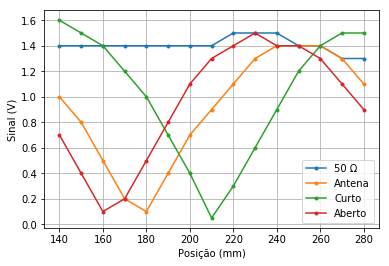

In [10]:
# Position [mm]
pos = numpy.array([140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280])

# Signal with 75 Ω termination [mV]
v75 = numpy.array([1.0, 0.8, 0.5, 0.2, 0.1, 0.4, 0.7, 0.90, 1.1, 1.3, 1.4, 1.4, 1.4, 1.3, 1.1])

# Signal with short-circuit termination [V]
vshort = numpy.array([1.6, 1.5, 1.4, 1.2, 1.0, 0.7, 0.4, 0.05, 0.3, 0.6, 0.9, 1.2, 1.4, 1.5, 1.5])

# Signal with open-circuit termination [V]
vopen = numpy.array([0.7, 0.4, 0.1, 0.2, 0.5, 0.8, 1.1, 1.3, 1.4, 1.5, 1.4, 1.4, 1.3, 1.1, 0.9])

# Signal with 50 Ω termination [V]
v50 = numpy.array([1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.4, 1.4, 1.3, 1.3])

pyplot.plot(pos, v50, '.-', label='50 Ω')
pyplot.plot(pos, v75, '.-', label='Antena')
pyplot.plot(pos, vshort, '.-', label='Curto')
pyplot.plot(pos, vopen, '.-', label='Aberto')
pyplot.legend()
pyplot.xlabel('Posição (mm)')
pyplot.ylabel('Sinal (V)')
pyplot.grid(True)

**RESPOSTA** Na curva de $50\,\Omega$ é possível observar que não ocorre reflexão da fonte com a carga, e assim praticamente toda a potência chega à carga. Para os casos de curto-circuito e aberto pode-se observar um efeito de onda estacionária (onde o ponto de mínimo é referente ao nó) no qual as duas curvas tem uma diferença de fase de aproximadamente $\pi$ radianos, devido ao fato que no caso do curto deve-se obter tensão nula e para o caso em aberto,  tensão máxima na extremidade da carga ($z' = 0$).

   Na curva referente à antena, observa-se que como a diferença entre vales e picos é muito grande sua ROE é muito alta e, portanto, a antena está muito descasada. Como a frequência de operação da antena para qual ela está casada é de 2.5Ghz, e a frequência utilizada foi de 1Ghz é de se esperar que a antena estivesse descasada.

# Orientação para submissão do relatório final

Após finalizar o experimento e o relatório:

1. Gere um arquivo PDF do roteiro completo: clique em *File/Print Preview* e gere o PDF;
1. **Revise** seu relatório;
1. Envie o relatório final pelo site do curso (apenas um aluno envia pelo grupo);
1. Crie um backup do seu relatório (arquivos ipynb e PDF) e guarde com você;
1. Apague os seus arquivos de trabalho do computador.
 
Assegure-se de que:
- O início do relatório indentifica os alunos e os respectivos RAs;
- Todas as figuras foram carregadas apropriadamente e estão legíveis;
- O texto das respostas nas células não está incompleto ou cortado;
- As grandezas apresentadas no texto e nos cálculos possuem unidades;
- Seus resultados sejam referenciados e discutidos no texto.